In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import csv 

from sklearn.model_selection import train_test_split
#print('',)

#from sklearn.linear_model import LinearRegression

In [2]:

#  loading the data set 
file = pd.read_csv('BSOM_DataSet_for_HW2.csv')

df=file[['all_mcqs_avg_n20','all_NBME_avg_n4','STEP_1']]

df.isnull().any()

df.fillna(df['STEP_1'].mean(), inplace=True)

print(df.isnull().any())
# seperating the data into independedent variables and target varibles



X = np.array(df.iloc[:, :-1])  # values converts it into a numpy array

target=np.array(df.iloc[:, -1])  # -1 means that calculate the dimension of rows, but have 1 column


print(X.shape)
print(target.shape)


all_mcqs_avg_n20    False
all_NBME_avg_n4     False
STEP_1              False
dtype: bool
(115, 2)
(115,)


C:\ANACONDA_EXECUTABLE\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [3]:


X_train, X_test, y_train, y_test = train_test_split(X,target, test_size=0.30,random_state=7)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 2)
(35, 2)
(80,)
(35,)


In [4]:
def initParam(lenw):
    weig=np.random.rand(1,lenw)
    int_b=0
    return weig,int_b
def sig(X,weig,int_b):
    sig_z=np.dot(weig,X.T)+int_b
    
    return sig_z

def cost_fun(sig_z,y):
    m=len(y)
    costj=(1/2*m)*np.sum(np.square(sig_z-y))
    return costj

def derivations(x,y,sig_z):
    m=len(y)
    deriv_z=(1/m)*(sig_z-y)
    
    deriv_w=np.dot(deriv_z,x)
    deriv_b=np.sum(deriv_z)
    
    return deriv_w,deriv_b

def gradDesc(weig,int_b,deriv_w,deriv_b,lr):
    weig=weig-lr*deriv_w
    
    int_b=int_b-lr*deriv_b
    
    return weig,int_b


In [5]:

lr=0.001
weig,int_b=initParam(2)
J_ttl=[]
costj=[]
for i in range(2000):
   
    sig_z=sig(X_train,weig,int_b)
    #print(z)
    costj=cost_fun(sig_z,y_train)

    deriv_w,deriv_b=derivations(X_train,y_train,sig_z)
    weig,int_b=gradDesc(weig,int_b,deriv_w,deriv_b,lr)
    
    J_ttl.append(costj)
print(weig,int_b)

[[78.40588806 81.45636845]] 99.42171358122427


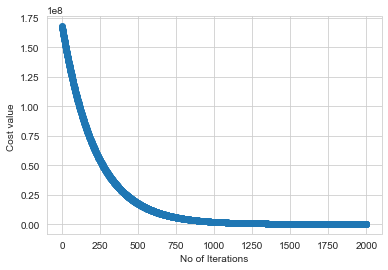

In [6]:

myarray = np.asarray(J_ttl)

#print(myarray)
i=np.arange(2000)
plt.scatter(i,myarray)
plt.plot(i,myarray)
plt.xlabel('No of Iterations')
plt.ylabel('Cost value ')
plt.show()



In [7]:


y_pred=sig(X_test,weig,int_b)
y_pred

array([[230.82131554, 235.08252248, 216.35209074, 232.29363113,
        237.51417695, 233.28025899, 221.98206228, 231.66745596,
        204.96023574, 229.6931283 , 221.40164432, 236.16602445,
        223.67434314, 231.65005968, 213.42485584, 235.46037145,
        213.86478636, 222.62027403, 240.88241432, 224.94301781,
        228.26656991, 231.34072389, 223.75274903, 209.89980669,
        236.90218224, 228.25131751, 228.75225764, 217.31142962,
        238.82968076, 241.58806731, 218.2654088 , 244.31594905,
        222.55926442, 231.02388452, 224.91144107]])

In [8]:
def mse(y_true,y_Pred):
    mse=1/len(y_true)*np.sum(np.subtract(y_true,y_Pred)**2)
    return mse


def r_square(y_true,y_Pred):
    r2= 1- (np.sum(np.subtract(y_true,y_Pred)**2)/np.sum(np.subtract(y_true,np.mean(y_true))**2))
    return r2
    
import statistics  as s
def prsn_cef(y_test,y_pred):
    df_1=pd.DataFrame(y_test)
    df_2 = pd.DataFrame(y_pred)            

    result = pd.concat([df_1, df_2.T], axis=1)#.reindex(df_1.index)
    prsn=(result.iloc[:,0].cov(result.iloc[:,1]))/(s.stdev(result.iloc[:,0])*s.stdev(result.iloc[:,1]))
    
    return prsn


    


In [9]:
mse_cal=mse(y_test, y_pred)

print('MSE for multivariate is :',mse_cal)


r_2=r_square(y_test, y_pred)

print('R- square value for multivariate is :',r_2)

psn=prsn_cef(y_test,y_pred)
print('Pearson Correaltion coefficient: ',psn )





MSE for multivariate is : 72.99540399648221
R- square value for multivariate is : 0.6321189722310372
Pearson Correaltion coefficient:  0.8191946695187258


In [10]:
"""
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

clf = linear_model.SGDRegressor(max_iter=2000,alpha =0.001)
clf.fit(X_train, y_train)
y_pre=clf.predict(X_test)

print('MSE value for multivariate linear regression using sklearn  ',mean_squared_error(y_test, y_pre))
print('R square value for multivariate linear regression using sklearn', r2_score(y_test, y_pre))

#print(mean_squared_error(y_test, y_pred))
#print(clf.coef_,clf.intercept_) """

"\nfrom sklearn import linear_model \nfrom sklearn.metrics import mean_squared_error\nfrom sklearn.metrics import r2_score\n\nclf = linear_model.SGDRegressor(max_iter=2000,alpha =0.001)\nclf.fit(X_train, y_train)\ny_pre=clf.predict(X_test)\n\nprint('MSE value for multivariate linear regression using sklearn  ',mean_squared_error(y_test, y_pre))\nprint('R square value for multivariate linear regression using sklearn', r2_score(y_test, y_pre))\n\n#print(mean_squared_error(y_test, y_pred))\n#print(clf.coef_,clf.intercept_) "